<a href="https://colab.research.google.com/github/anruki/PID-sistema-de-control/blob/main/simulationpy_Ziegler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SISTEMAS DE CONTROL – INGENIERÍA MATEMÁTICA
## Inverted Pendulum Stabilization using PID Control `[Proyecto Final]`


Firstly, we install the `control` package in Python, which provides tools for control systems analysis and design.

In [122]:
!pip install control

**1.   MODELING**



To model an inverted pendul system, we must define its transfer function given by:
$$ G(s) = \frac{1}{s^2 - \frac{g}{l}} $$


In [123]:
import numpy as np
import control as ctrl
g = 9.81 # gravity (m/s^2)
l = 1.0 # length of the pendulum (m)
m = 1.0 # mass of the pendulum (kg)
# Transfer function G(s) = 1 / (s^2 - g/l)
num = [1]
den = [1, 0, -g/l]
G = ctrl.TransferFunction(num, den)


The transfer function is the result of linearalising and applying Laplace to the equations of motion of the inverted pendulum.

**2.   STABILITY ANALISIS**

The roots of the denominator of the transfer function G determine the stability of the system. With Pyhon function `poles()` we obtain these roots.

In [124]:
poles = ctrl.poles(G)
print("Poles of the system:", poles)

Poles of the system: [-3.13209195+0.j  3.13209195+0.j]


For our system, we have obtained the poles printed above, we identify that one of them is positive.

According to the `principle of Routh-Hurwitz`, in order for a linear system to be stable, all of its poles must have negative real parts, that is they must all lie within the left-half of the s-plane.

Therefore, the system is unstable.To stabilise it, we will use a PID controller.

**3. PID CONTROLLER DESIGN**

We are going to test different parameters for the gains `(Kp,Ki,Kd)` of a PID controller to stabilize the inverted pendulum.

In [125]:
Kp = [1.0, 10.0, 100.0, 100.0] # Proportional gain
Ki = [1.0, 1.0, 1.0, 1.0]      # Integral gain
Kd = [2.0, 1.0, 1.0, 20.0]     # Derivative gain

to stabilize the inverted pendulum. They
will determine the gains (Kp, Ki, Kd) using techniques like Ziegler-Nichols or
by manually tuning the gains to achieve the desired performance

**4. SIMULATION**

We observe the response of the system to different
initial conditions and disturbances.

**First results**


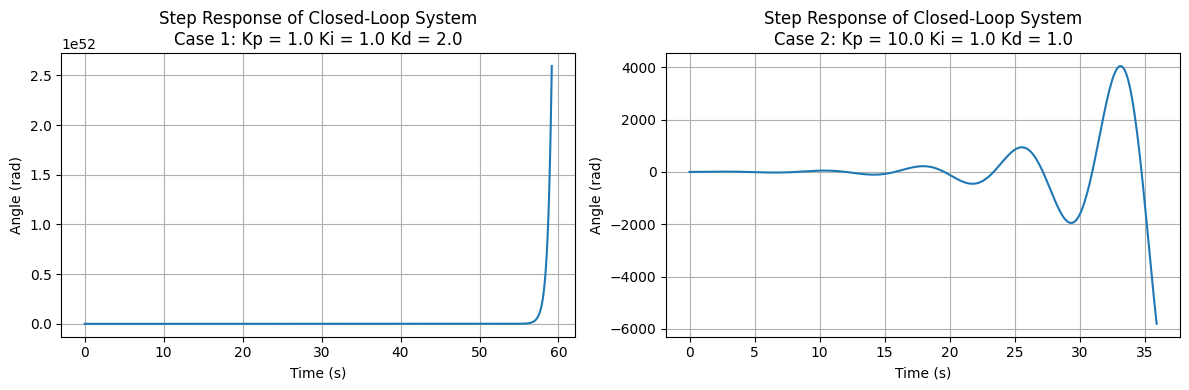

In [126]:
import matplotlib.pyplot as plt
# Create a figure with subplots
fig, axs = plt.subplots(1,2, figsize=(12, 4))

# Iterate over each subplot
for i in range(2):
  # PID controller
  controller = ctrl.TransferFunction([Kd[i], Kp[i], Ki[i]], [1, 0])
  # Closed-loop system
  closed_loop = ctrl.feedback(G * controller)
  # Time response
  t, y = ctrl.step_response(closed_loop)
  # Plotting
  axs[i].plot(t, y)
  axs[i].set_xlabel('Time (s)')
  axs[i].set_ylabel('Angle (rad)')
  axs[i].set_title(f'Step Response of Closed-Loop System\nCase {i+1}: Kp = {Kp[i]} Ki = {Ki[i]} Kd = {Kd[i]}')
  axs[i].grid(True)
plt.tight_layout()
plt.show()


These responses are not stable. We modify the response by increasing the proportional and derivative gain.

<Figure size 1200x400 with 0 Axes>

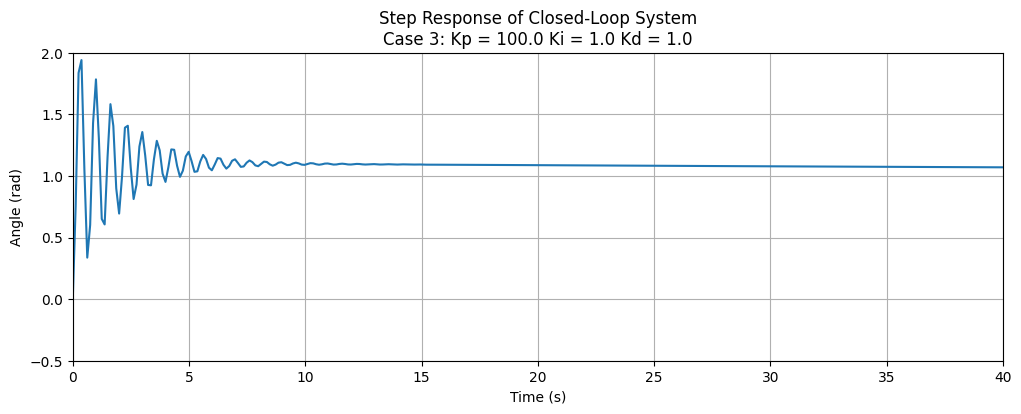

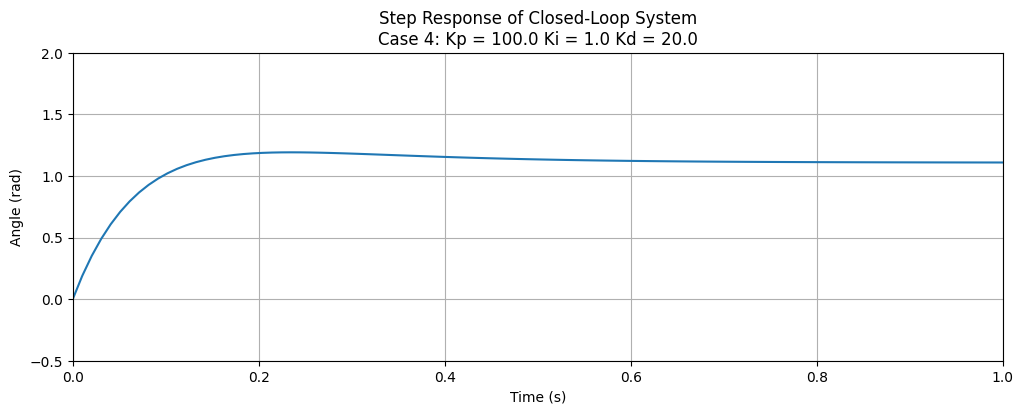

In [127]:
import matplotlib.pyplot as plt
# Specify the size of the plot
plt.figure(figsize=(12, 4))
x_limit = [40,1]
# Iterate over each subplot
for i in range(2,4):
  # PID controller
  controller = ctrl.TransferFunction([Kd[i], Kp[i], Ki[i]], [1, 0])
  # Closed-loop system
  closed_loop = ctrl.feedback(G * controller)
  # Time response
  t, y = ctrl.step_response(closed_loop)
  # Plotting
  # Specify the size of the plot
  plt.figure(figsize=(12, 4))
  plt.plot(t, y)
  # Labels
  plt.xlabel('Time (s)')
  plt.ylabel('Angle (rad)')
  # Tittle and grud
  plt.title(f'Step Response of Closed-Loop System\nCase {i+1}: Kp = {Kp[i]} Ki = {Ki[i]} Kd = {Kd[i]}')
  plt.grid(True)
  # Specify the limits of the x-axis and y-axis
  plt.xlim(0, x_limit[i-2])
  plt.ylim(-0.5, 2)
  plt.show()


In case 3, we only increased the $K_p$ variable and got a stable response, specifically it stabilises in aproximately 15 seconds.
By also increasing the $K_d$ variable we have gotten a stable response in less than 1 second for case 4, which is a remarkable improvement.


**Ziegler-Nichols method**

Based on the first unstable result, we are going to obtain the parameters for a stable system using the Ziegler-Nichols method.


1. Step Test: Apply a step input to your system and observe the response. This could be done experimentally or through simulation.
2. Determine Ultimate Gain `Ku` and Oscillation Period `Pu`: From the step response, find the amplitude of sustained oscillations `Ku` and the corresponding period `Pu`
3. Calculate PID Parameters:

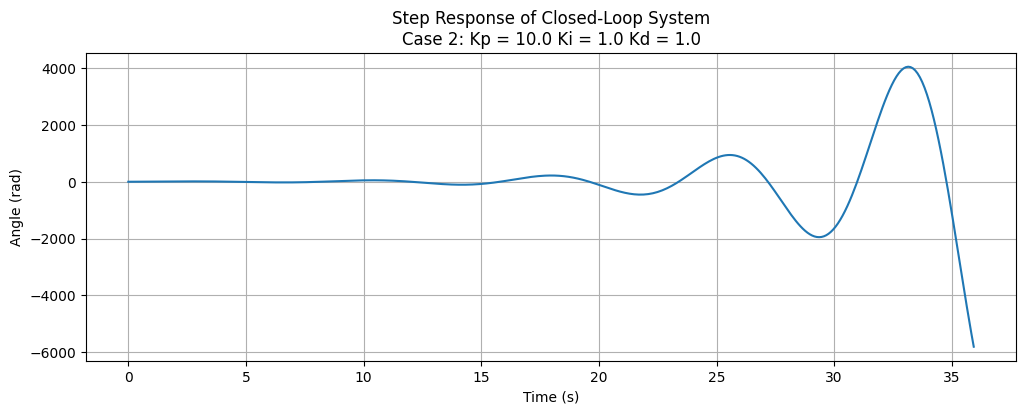

In [128]:
import matplotlib.pyplot as plt
import control as ctrl

# Create a figure with subplots
plt.figure(figsize=(12, 4))

Ku_values = []
Pu_values = []

# Iterate over each subplot
i = 1
# PID controller
controller = ctrl.TransferFunction([Kd[i], Kp[i], Ki[i]], [1, 0])
# Closed-loop system
closed_loop = ctrl.feedback(G * controller)
# Time response
t, y = ctrl.step_response(closed_loop)
# Plotting
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title(f'Step Response of Closed-Loop System\nCase {i+1}: Kp = {Kp[i]} Ki = {Ki[i]} Kd = {Kd[i]}')
plt.grid(True)
plt.show()



4. Implement and Fine-Tune: Implement the PID controller with the calculated parameters and fine-tune them if necessary to achieve desired performance.

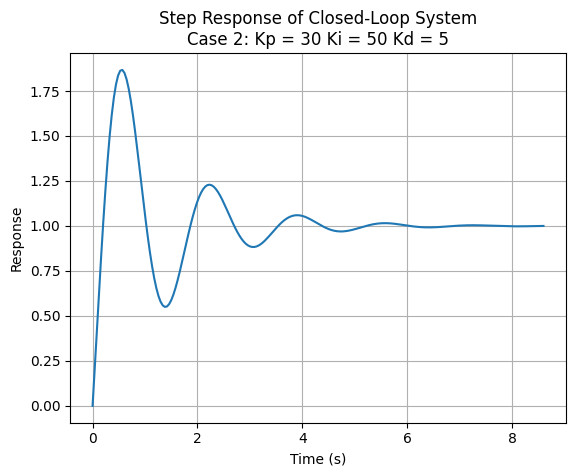

Ku = 0.9335439126342961, Pu = 1.7435304738864685


In [132]:
import matplotlib.pyplot as plt
import control as ctrl
Kp = [1.0, 30] # Proportional gain
Ki = [1.0, 50]      # Integral gain
Kd = [2.0, 5]     # Derivative gain

# Choose a case
i = 1

# PID controller
controller = ctrl.TransferFunction([Kd[i], Kp[i], Ki[i]], [1, 0])
# Closed-loop system
closed_loop = ctrl.feedback(G * controller)
# Time response
t, y = ctrl.step_response(closed_loop)

# Plot the step response
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title(f'Step Response of Closed-Loop System\nCase {i+1}: Kp = {Kp[i]} Ki = {Ki[i]} Kd = {Kd[i]}')
plt.grid(True)

# Find Ku and Pu from the step response
max_value = max(y)
min_value = min(y)
Ku = (max_value - min_value) / 2  # Amplitude of oscillations

# Find period of oscillations
period = []
for j in range(len(y) - 1):
    if y[j] > max_value / 2 and y[j+1] < max_value / 2:
        period.append(t[j])

# Calculate Pu if there are enough elements in the period list
if len(period) >= 2:
    Pu = period[1] - period[0]  # Period of oscillations
else:
    Pu = None

# Display the plot
plt.show()

# Print Ku and Pu values
print(f"Ku = {Ku}, Pu = {Pu}")


In [135]:
Ku = Ku - 0.5
Pu = Pu - 1
Kp = 0.6 * Ku
Ki = 2 * Kp / Pu
Kd = Kp * Pu / 8

# Create PID controller
controller = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])

# Use the controller for your system

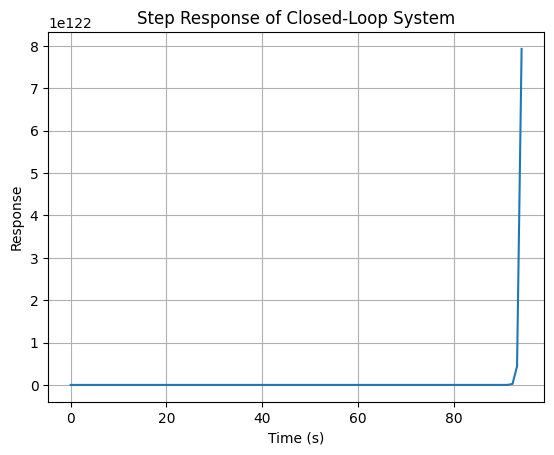

In [136]:
# Closed-loop system
closed_loop = ctrl.feedback(G * controller)
# Time response
t, y = ctrl.step_response(closed_loop)

# Plot the step response
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title(f'Step Response of Closed-Loop System')
plt.grid(True)

**5. PERFORMANCE ANALYSIS**

Students will analyze the performance of the controlled system in terms of set-
tling time, overshoot, and steady-state error. They will also investigate the
robustness of the controller to parameter variations and noise.

**6. VISUALIZATION**



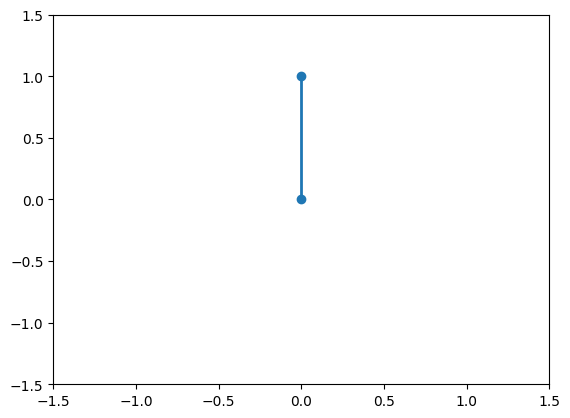

In [ ]:
import matplotlib.animation as animation
def animate(i):
  line.set_data([0, np.sin(y[i])], [0, np.cos(y[i])])
  return line,
fig, ax = plt.subplots()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
line, = ax.plot([], [], 'o-', lw=2)
ani = animation.FuncAnimation(fig, animate, frames=len(y), interval=50, blit=True)
plt.show()